In [ ]:
# Tópicos em Estatística 1 - Redes Neurais parte 2 2/2023 Universidade de Brasília - Departamento de Estatística- UnB
# Lista 1 - Classificação de Digitais utilizando Redes Neurais Convolucionais (CNN)
# João Pedro Ferreira 180113712

In [ ]:
# Problema : Classificar digitais de acordo com 2 labels : F (female ) e M (male)

In [ ]:
# importing libraries 
import tensorflow as tf
from tensorflow.keras import models 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import * 
from tensorflow.keras.backend import *


import numpy as np
import os 
import PIL
import pandas as pd
from PIL import Image


In [55]:
#dataset_dir= r"C:\Users\jp\Desktop\unb\Unb-Estatistica\Topicos 1 parte 2\lista1-cnn\finger prints dataset\Treino"
os.chdir(r"C:\Users\jp\Desktop\unb\Unb-Estatistica\Topicos 1 parte 2\lista1-cnn\finger prints dataset\Treino")
imagens_treino=os.listdir()
imagens_treino[0:10] # primeiras 10 imagens rotuladas com F ou M (as 10 primeiras são mulheres)

['F_0015.BMP',
 'F_0030.BMP',
 'F_0031.BMP',
 'F_0034.BMP',
 'F_0036.BMP',
 'F_0052.BMP',
 'F_0067.BMP',
 'F_0071.BMP',
 'F_0081.BMP',
 'F_0088.BMP']

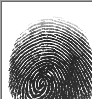

In [56]:
fingerprint_0=PIL.Image.open(imagens_treino[0])
fingerprint_0

In [57]:
np.array(fingerprint_0).shape
# dimensões da imagem  
# height=103 (103 linhas de altura)
# width = 96 (96 colunas)
# dimensao pixel : 4 = rgba  

(103, 96, 4)

In [123]:
np.array(fingerprint_0)[1:10]

array([[[160, 160, 160, 255],
        [105, 105, 105, 255],
        [105, 105, 105, 255],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[160, 160, 160, 255],
        [105, 105, 105, 255],
        [255, 255, 255, 255],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[160, 160, 160, 255],
        [105, 105, 105, 255],
        [255, 255, 255, 255],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       ...,

       [[160, 160, 160, 255],
        [105, 105, 105, 255],
        [255, 255, 255, 255],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[160, 160, 160, 255],
        [105, 105, 105, 255],
        [255, 255, 255, 255],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[160

In [59]:
#chunk para pegar as labels  e rotular M= 1 e F= 0
labels_lista= [1 if label[0]=="M" else 0 for label in imagens_treino]
pd.Series(labels_lista).value_counts()

1    3260
0     740
dtype: int64

In [60]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(labels_lista),
                                                 y=labels_lista)


class_weights = {i : class_weights[i] for i in range(2)}
class_weights

{0: 2.7027027027027026, 1: 0.6134969325153374}

In [390]:
help(compute_class_weight)

NameError: name 'compute_class_weight' is not defined

In [61]:
diretorio= r"C:\Users\jp\Desktop\unb\Unb-Estatistica\Topicos 1 parte 2\lista1-cnn\finger prints dataset\Treino"
dataset=image_dataset_from_directory(
    diretorio,
    labels= labels_lista,
    validation_split=0.2,
    subset="training",
    label_mode='binary',
    color_mode='rgba',
    batch_size=32,
    image_size=(96,96),
    shuffle=True,
    seed=2008,
    crop_to_aspect_ratio=False
)


val_dataset=image_dataset_from_directory(
    diretorio,
    labels= labels_lista,
    validation_split=0.2,
    subset="validation",
    label_mode='binary',
    color_mode='rgba',
    batch_size=32,
    image_size=(96,96),
    shuffle=False,
    seed=2008,
    crop_to_aspect_ratio=False
)


Found 4000 files belonging to 2 classes.
Using 3200 files for training.
Found 4000 files belonging to 2 classes.
Using 800 files for validation.


In [8]:
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 96, 96, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

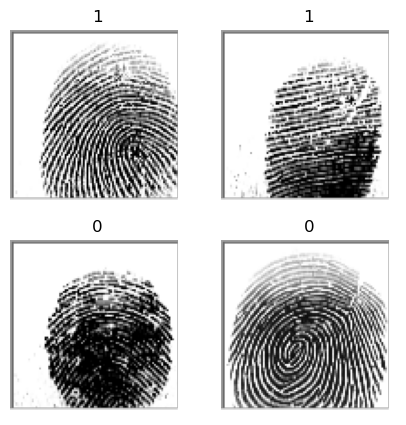

In [62]:
#visualização 
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
for images, labels in dataset.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(labels_lista[-i])
    plt.axis("off")


In [63]:
clear_session()

In [64]:

# arquitetura 
fingerprint_model = Sequential([
  layers.Rescaling(1./255, input_shape=(96, 96, 4)),
  layers.Conv2D(32, 4),
  layers.MaxPooling2D(pool_size=(4, 4),strides=(2, 2)),
  layers.Conv2D(64, 4),
  layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)),
  layers.Conv2D(128, 4),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(1, activation= 'sigmoid')
    
]) 


In [65]:
fingerprint_model.compile(optimizer=SGD(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='accuracy', patience=10, verbose=1)


In [66]:
fingerprint_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 96, 96, 4)         0         
                                                                 
 conv2d (Conv2D)             (None, 93, 93, 32)        2080      
                                                                 
 max_pooling2d (MaxPooling2  (None, 45, 45, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 21, 21, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 128)       1

In [67]:
#6422  e 6381
#30 - > melhor
#10 voltar para 
history= fingerprint_model.fit(
    x=dataset,
    epochs=60,
    validation_data= val_dataset,
    callbacks = [early_stopping],
    class_weight=class_weights
)

Epoch 1/60
100/100 [==============================] - 78s 768ms/step - loss: 0.6936 - accuracy: 0.5581 - val_loss: 0.5977 - val_accuracy: 0.7362
Epoch 2/60
100/100 [==============================] - 77s 771ms/step - loss: 0.6583 - accuracy: 0.6131 - val_loss: 0.7166 - val_accuracy: 0.5150
Epoch 3/60
100/100 [==============================] - 78s 776ms/step - loss: 0.6434 - accuracy: 0.6347 - val_loss: 0.7779 - val_accuracy: 0.4275
Epoch 4/60
100/100 [==============================] - 78s 781ms/step - loss: 0.6375 - accuracy: 0.6372 - val_loss: 0.6280 - val_accuracy: 0.6550
Epoch 5/60
100/100 [==============================] - 78s 776ms/step - loss: 0.6313 - accuracy: 0.6528 - val_loss: 0.6802 - val_accuracy: 0.5788
Epoch 6/60
100/100 [==============================] - 77s 772ms/step - loss: 0.6230 - accuracy: 0.6459 - val_loss: 0.5709 - val_accuracy: 0.7163
Epoch 7/60
100/100 [==============================] - 78s 775ms/step - loss: 0.6196 - accuracy: 0.6606 - val_loss: 0.6682 - val_ac

100/100 [==============================] - 82s 816ms/step - loss: 0.0138 - accuracy: 0.9994 - val_loss: 1.3346 - val_accuracy: 0.8213
Epoch 58/60
100/100 [==============================] - 78s 777ms/step - loss: 0.0127 - accuracy: 0.9994 - val_loss: 1.3445 - val_accuracy: 0.8175
Epoch 59/60
100/100 [==============================] - 78s 780ms/step - loss: 0.0117 - accuracy: 0.9994 - val_loss: 1.3849 - val_accuracy: 0.8225
Epoch 60/60
100/100 [==============================] - 88s 877ms/step - loss: 0.0106 - accuracy: 0.9994 - val_loss: 1.3610 - val_accuracy: 0.8225


In [115]:
history.history['val_accuracy'][-1] # acuracia na validação

0.8224999904632568

In [68]:
diretorio_teste= r"C:\Users\jp\Desktop\unb\Unb-Estatistica\Topicos 1 parte 2\lista1-cnn\finger prints dataset\Teste"
dataset_teste=image_dataset_from_directory(
    diretorio_teste,
    labels= None,
    image_size=(96,96),
    color_mode='rgba',
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    crop_to_aspect_ratio=False,
)

Found 2000 files belonging to 1 classes.


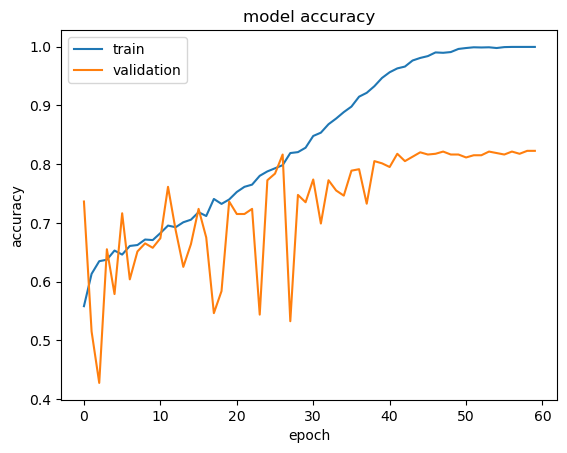

In [75]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

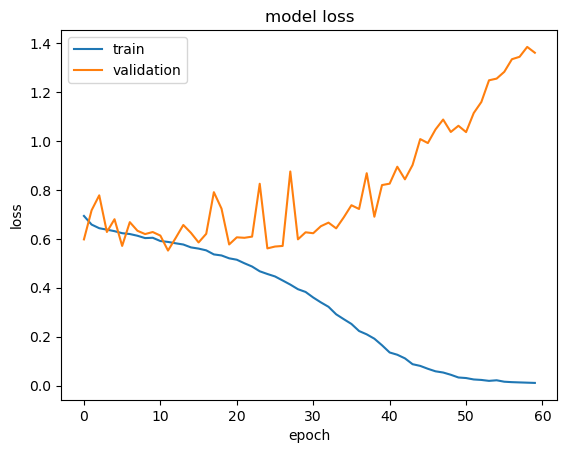

In [73]:
## summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [76]:
fingerprint_model.save('ModeloFingerPrint82.keras')


In [69]:
predictions = fingerprint_model.predict(dataset_teste)

# Convert the predicted probabilities to class labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int)
print(predicted_labels)

63/63 [==============================] - 13s 210ms/step
[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


In [454]:
len(predicted_labels)

2000

In [70]:
predicted_labels_flat = predicted_labels.flatten()

# Create a Series and compute value counts
value_counts = pd.Series(predicted_labels_flat).value_counts()

# Now, value_counts contains the counts of unique values (0 and 1)
print(value_counts)

1    1732
0     268
dtype: int64


In [86]:
from tabulate import tabulate

# Create a DataFrame for the value counts data
data_table = pd.DataFrame({'Classes : 1-Male , 0- Female': value_counts.index, 'Frequência': value_counts.values})

table_str = tabulate(data_table, headers='keys', tablefmt='pretty')
print(table_str)

+---+------------------------------+------------+
|   | Classes : 1-Male , 0- Female | Frequência |
+---+------------------------------+------------+
| 0 |              1               |    1732    |
| 1 |              0               |    268     |
+---+------------------------------+------------+


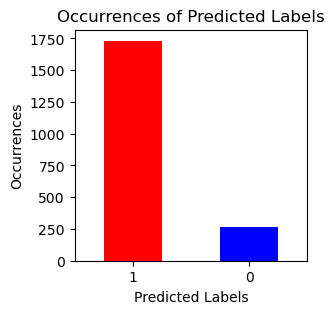

In [83]:
plt.figure(figsize=(3, 3))
value_counts.plot(kind='bar', color=['red','blue'])
plt.xlabel('Predicted Labels')
plt.ylabel('Occurrences')
plt.title('Occurrences of Predicted Labels')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [106]:
file_paths = dataset_teste.file_paths
predicao_tuples = []
predicted_labels = ["M" if i==1 else "F" for i in predicted_labels]
# Iterate through the file paths and predictions
for file_path, prediction in zip(file_paths, predicted_labels ):
    # Extract the filename from the file path
    filename = file_path.split("/")[-1]  # Adjust the split based on your file path format
    filename= filename.split('\\')[-1]
    predicao_tuples.append((filename, prediction))
    # Print the filename and its corresponding prediction
    #print(f"{filename},{prediction}")

In [124]:
predicao_tuples[1:10]

[('0006.BMP', 'M'),
 ('0008.BMP', 'F'),
 ('0009.BMP', 'M'),
 ('0011.BMP', 'M'),
 ('0013.BMP', 'M'),
 ('0021.BMP', 'M'),
 ('0022.BMP', 'M'),
 ('0029.BMP', 'M'),
 ('0033.BMP', 'M')]

In [ ]:
# import csv




csv_filename = "fingerprintPredict1.csv"

# Write the data to the CSV file
with open(csv_filename, 'w', newline='') as csvfile:
    fieldnames = ["Nome", "Classificação"]  # Column headers
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header row
    writer.writeheader()

    # Write data from result_tuples
    for filename, prediction in predicao_tuples:
        writer.writerow({"Nome": filename, "Classificação": prediction})

print(f"CSV file '{csv_filename}' has been created.")

In [109]:
import pandas as pd

csv_encoding = 'latin-1'
# Read the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\jp\Desktop\unb\Unb-Estatistica\Topicos 1 parte 2\lista1-cnn\finger prints dataset\Treino\fingerprintPredict1.csv", encoding=csv_encoding)

df


,Nome,Classificação
0,0002.BMP,M
1,0006.BMP,M
2,0008.BMP,F
3,0009.BMP,M
4,0011.BMP,M
...,...,...
1995,5970.BMP,M
1996,5975.BMP,M
1997,5980.BMP,M
1998,5985.BMP,M
